## vid8

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import deque, Counter
import random

In [2]:
folder = 'crypto_data\crypto_data'

In [3]:
import os

ratios = os.listdir(folder)

In [4]:
DF = pd.DataFrame()

names = ['time', 'low', 'high', 'open', 'close', 'volume']
for r in ratios:
    df = pd.read_csv(os.path.join(folder, r),
                    names = names)
    df.set_index('time', inplace = True)
    df = df[['close', 'volume']]
    df.rename(columns = {c:r[:4]+c for c in df.columns}, inplace = True)
    if len(DF) == 0:
        DF = df
    else:
        DF = DF.join(df)
    #print (DF.head(), df.head())

In [5]:
window = 60
future_to_predict = 2
ratio_to_predict = 'BTC'

def classify(current, future):
    return 1/(1+np.exp(-32 * (float(future)-float(current))))

In [6]:
DF.columns

Index(['BCH-close', 'BCH-volume', 'BTC-close', 'BTC-volume', 'ETH-close',
       'ETH-volume', 'LTC-close', 'LTC-volume'],
      dtype='object')

In [7]:
TrainData = pd.DataFrame(DF)
TrainData[ratio_to_predict+'-future'] = TrainData[ratio_to_predict+'-close'].shift(-future_to_predict)

In [8]:
TrainData.columns

Index(['BCH-close', 'BCH-volume', 'BTC-close', 'BTC-volume', 'ETH-close',
       'ETH-volume', 'LTC-close', 'LTC-volume', 'LTC-future'],
      dtype='object')

In [9]:
DF.columns

Index(['BCH-close', 'BCH-volume', 'BTC-close', 'BTC-volume', 'ETH-close',
       'ETH-volume', 'LTC-close', 'LTC-volume', 'LTC-future'],
      dtype='object')

In [10]:
DF is TrainData

False

In [11]:
TrainData[ratio_to_predict+'-target'] = list(map(classify, 
                                            TrainData[ratio_to_predict+'-close'], 
                                            TrainData[ratio_to_predict+'-future']
                                           ))

c:\users\prasu\desktop\repositories\sentdex_keras\sent_keras\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\prasu\desktop\repositories\sentdex_keras\sent_keras\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


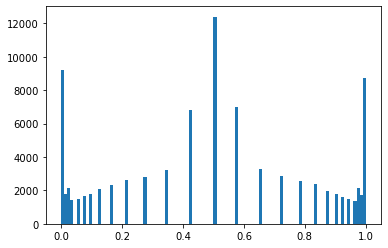

In [12]:
plt.hist(TrainData[ratio_to_predict+'-target'], bins = 100)
plt.show()

In [13]:
TrainData

,BCH-close,BCH-volume,BTC-close,BTC-volume,ETH-close,ETH-volume,LTC-close,LTC-volume,LTC-future,LTC-target
time,,,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,NaN,NaN,96.580002,9.647200,96.500000,0.071753
1528968720,870.859985,26.856577,6487.379883,7.706374,486.010010,26.019083,96.660004,314.387024,96.389999,0.000177
1528968780,870.099976,1.124300,6479.410156,3.088252,486.000000,8.449400,96.570000,77.129799,96.519997,0.167968
1528968840,870.789978,1.749862,6479.410156,1.404100,485.750000,26.994646,96.500000,7.216067,96.440002,0.127869
1528968900,870.000000,1.680500,6479.979980,0.753000,486.000000,77.355759,96.389999,524.539978,96.470001,0.928247
...,...,...,...,...,...,...,...,...,...,...
1535215020,531.479980,0.016868,6714.520020,1.002652,279.359985,8.790519,58.009998,7.301921,58.080002,0.903796
1535215080,531.469971,0.013854,6714.520020,1.021925,279.369995,1.311763,58.020000,23.802017,58.090000,0.903784
1535215140,531.479980,0.016900,6715.000000,3.645508,279.660004,11.752819,58.020000,6.953497,NaN,NaN


## vid9

In [14]:
times = sorted(TrainData.index.values)
last10pct = times[-10000]
last10pct

1534508880

In [15]:
testdata = TrainData[TrainData.index>last10pct]
testdata

,BCH-close,BCH-volume,BTC-close,BTC-volume,ETH-close,ETH-volume,LTC-close,LTC-volume,LTC-future,LTC-target
time,,,,,,,,,,
1534508940,541.239990,0.030900,6482.000000,5.250585,298.750000,121.627495,57.560001,150.602371,57.689999,0.984631
1534509000,541.239990,0.761750,6482.000000,1.564580,298.779999,31.323853,57.689999,7.479010,57.660000,0.276885
1534509060,539.369995,4.063433,6481.990234,6.853326,298.399994,36.877357,57.689999,96.732811,57.660000,0.276885
1534509120,540.090027,6.906406,6472.509766,1.270809,298.500000,21.568947,57.689999,127.277771,57.660000,0.276885
1534509180,540.840027,0.223063,6475.660156,1.982166,298.579987,12.215804,57.660000,19.849148,57.660000,0.500000
...,...,...,...,...,...,...,...,...,...,...
1535215020,531.479980,0.016868,6714.520020,1.002652,279.359985,8.790519,58.009998,7.301921,58.080002,0.903796
1535215080,531.469971,0.013854,6714.520020,1.021925,279.369995,1.311763,58.020000,23.802017,58.090000,0.903784
1535215140,531.479980,0.016900,6715.000000,3.645508,279.660004,11.752819,58.020000,6.953497,NaN,NaN


In [16]:
traindata = TrainData[TrainData.index<last10pct]
traindata

,BCH-close,BCH-volume,BTC-close,BTC-volume,ETH-close,ETH-volume,LTC-close,LTC-volume,LTC-future,LTC-target
time,,,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,NaN,NaN,96.580002,9.647200,96.500000,0.071753
1528968720,870.859985,26.856577,6487.379883,7.706374,486.010010,26.019083,96.660004,314.387024,96.389999,0.000177
1528968780,870.099976,1.124300,6479.410156,3.088252,486.000000,8.449400,96.570000,77.129799,96.519997,0.167968
1528968840,870.789978,1.749862,6479.410156,1.404100,485.750000,26.994646,96.500000,7.216067,96.440002,0.127869
1528968900,870.000000,1.680500,6479.979980,0.753000,486.000000,77.355759,96.389999,524.539978,96.470001,0.928247
...,...,...,...,...,...,...,...,...,...,...
1534508520,537.900024,0.061063,6457.669922,0.326103,297.670013,22.275454,57.430000,30.984541,57.430000,0.500000
1534508580,537.900024,1.022200,6460.399902,1.235895,297.690002,15.865081,57.400002,15.433328,57.610001,0.998795
1534508640,537.890015,1.170853,6460.399902,1.604535,297.809998,72.669014,57.369999,63.192352,57.639999,0.999823


BCH-close


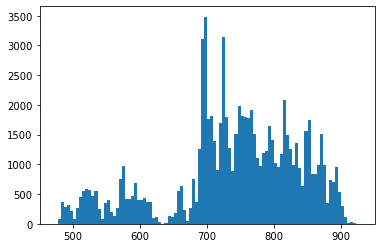

BCH-volume


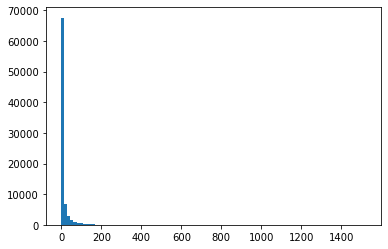

c:\users\prasu\desktop\repositories\sentdex_keras\sent_keras\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\prasu\desktop\repositories\sentdex_keras\sent_keras\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


BTC-close


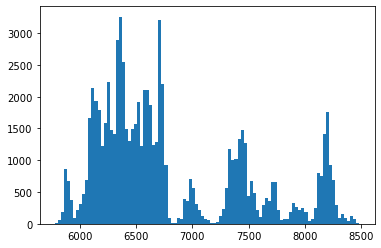

BTC-volume


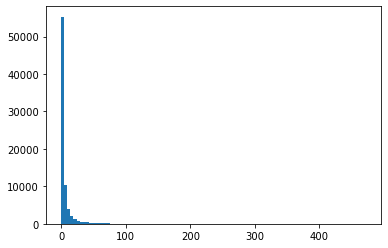

ETH-close


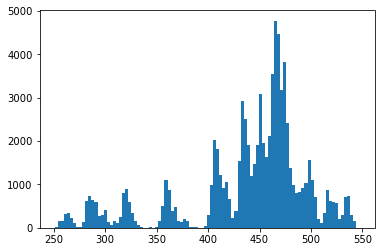

ETH-volume


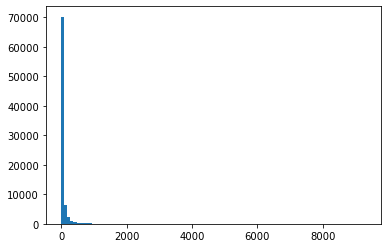

LTC-close


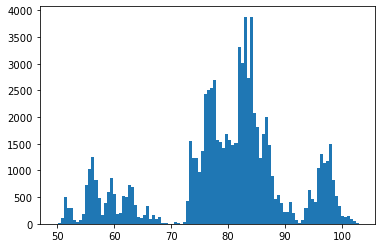

LTC-volume


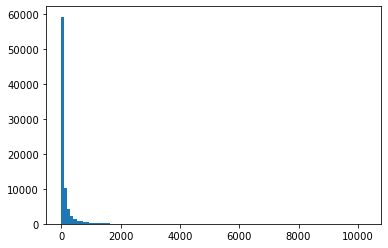

LTC-future


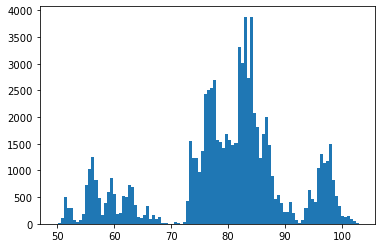

LTC-target


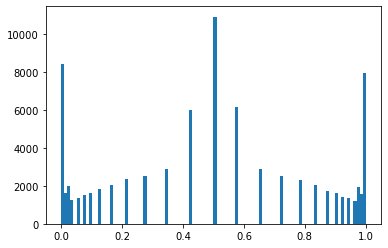

In [17]:
def show(df):
    for col in df.columns:
        plt.hist(df[col], bins = 100)
        print (col)
        plt.show()
show(traindata)

In [18]:
def preprocess_df(df):
    df = df.drop(ratio_to_predict+'-future', 1)
    for col in df.columns:
        if col != ratio_to_predict+'-target':
            df[col] = df[col].pct_change()
            df.dropna(inplace = True)
            df[col] = preprocessing.scale(df[col].values)
    df.dropna(inplace = True)
    
    
    
    print (df.head())
    return df

In [19]:
traindata = preprocess_df(traindata)

            BCH-close  BCH-volume  BTC-close  BTC-volume  ETH-close  \
time                                                                  
1528969140   0.011277   -0.006301  -0.002115   -0.075913   0.004717   
1528969200   0.277388   -0.005982  -0.226416    0.003838   0.004717   
1528969260   0.285877   -0.006285  -0.000456   -0.071186   0.021765   
1528969320   0.491579   -0.005996   0.115036   -0.047538   0.004717   
1528969380   0.568484   -0.006291   0.001286   -0.078948   0.004717   

            ETH-volume  LTC-close  LTC-volume  LTC-target  
time                                                       
1528969140   -0.010769  -0.545610   -0.119072    0.500000  
1528969200   -0.010339   0.004486   -0.120372    0.500000  
1528969260   -0.008159   0.004486   -0.072007    0.831996  
1528969320   -0.011064   0.004486   -0.109628    0.654725  
1528969380   -0.008162   0.004486   -0.045875    0.500000  


In [20]:
traindata

,BCH-close,BCH-volume,BTC-close,BTC-volume,ETH-close,ETH-volume,LTC-close,LTC-volume,LTC-target
time,,,,,,,,,
1528969140,0.011277,-0.006301,-0.002115,-0.075913,0.004717,-0.010769,-0.545610,-0.119072,0.500000
1528969200,0.277388,-0.005982,-0.226416,0.003838,0.004717,-0.010339,0.004486,-0.120372,0.500000
1528969260,0.285877,-0.006285,-0.000456,-0.071186,0.021765,-0.008159,0.004486,-0.072007,0.831996
1528969320,0.491579,-0.005996,0.115036,-0.047538,0.004717,-0.011064,0.004486,-0.109628,0.654725
1528969380,0.568484,-0.006291,0.001286,-0.078948,0.004717,-0.008162,0.004486,-0.045875,0.500000
...,...,...,...,...,...,...,...,...,...
1534508520,0.058279,-0.006305,0.622102,-0.085340,0.505575,-0.010330,0.004486,-0.120309,0.500000
1534508580,0.002684,-0.004946,0.464929,0.008370,0.060297,-0.010316,-0.391511,-0.113874,0.998795
1534508640,-0.011213,-0.006216,-0.000456,-0.053861,0.338345,-0.005024,-0.391784,-0.038777,0.999823


In [21]:
df2 = pd.DataFrame(DF)
def prepro(df):
    df = df.drop(ratio_to_predict+'-future', 1)
    for col in df2.columns:
        if col[-5:] == 'close':
            df[col] = list(map(classify, 
                                df[col], 
                                df[col].shift(-1)
                               ))
        elif col[-3:] == 'ume':
            '''
            df[col] = df[col].pct_change()
            df.dropna(inplace = True)
            df[col] = preprocessing.scale(df[col].values)
            '''
            
            df = df.drop(col, 1)
        df.dropna(inplace = True)
    return df

In [22]:
df2 = prepro(df2)
df2

c:\users\prasu\desktop\repositories\sentdex_keras\sent_keras\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
c:\users\prasu\desktop\repositories\sentdex_keras\sent_keras\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


,BCH-close,BCH-volume,BTC-close,BTC-volume,ETH-close,ETH-volume,LTC-close,LTC-volume,LTC-target
time,,,,,,,,,
1528968960,3.131101e-08,-0.006104,2.334269e-39,-0.038238,0.420598,-0.012115,0.071768,-0.108964,0.021045
1528969020,1.000000e+00,-0.006145,1.000000e+00,-0.042131,0.500000,0.004279,0.723115,-0.012136,0.217550
1528969080,5.794022e-01,-0.003837,4.225017e-01,-0.069484,0.500000,-0.009548,0.096218,-0.077751,0.096218
1528969140,9.999643e-01,-0.006181,3.275992e-19,-0.079524,0.500000,-0.011704,0.500000,-0.105209,0.500000
1528969200,9.999741e-01,-0.005842,5.000000e-01,0.004734,0.579402,-0.011250,0.500000,-0.106287,0.500000
...,...,...,...,...,...,...,...,...,...
1535214660,4.206056e-01,-0.005627,9.999329e-01,-0.069225,0.998795,-0.009759,0.579309,-0.090367,0.579309
1535214720,5.793944e-01,-0.006188,9.998707e-01,-0.069721,0.500000,-0.009269,0.500000,-0.099067,0.579340
1535214780,5.000000e-01,-0.005731,1.000000e+00,-0.072120,0.420840,-0.011534,0.500000,-0.101531,0.579340


BCH-close


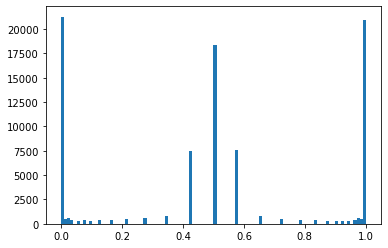

BCH-volume


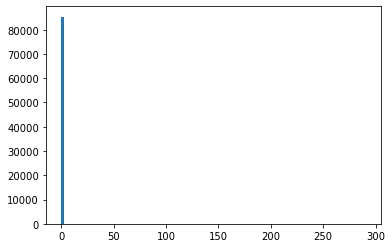

BTC-close


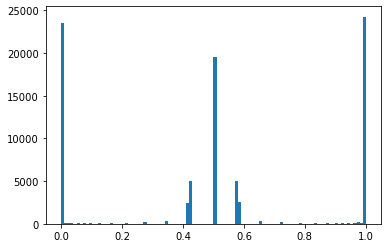

BTC-volume


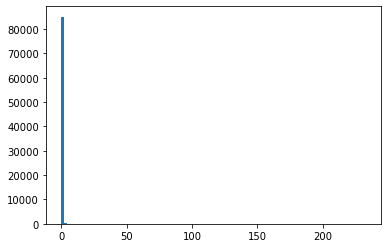

ETH-close


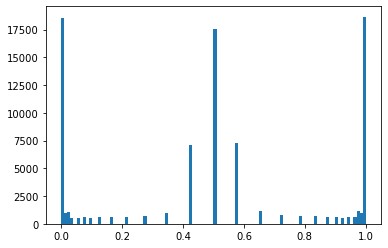

ETH-volume


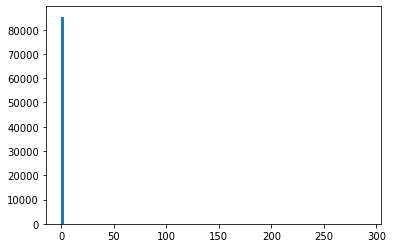

LTC-close


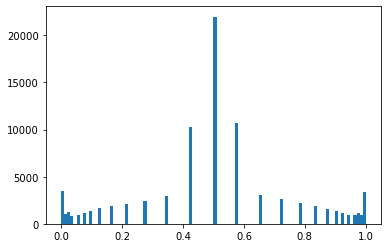

LTC-volume


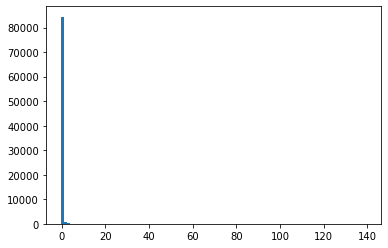

LTC-target


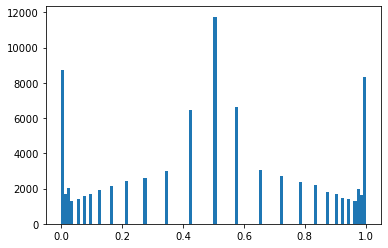

In [23]:
show(df2)

In [24]:
testdata = preprocess_df(testdata)

            BCH-close  BCH-volume  BTC-close  BTC-volume  ETH-close  \
time                                                                  
1534509420   0.159983   -0.130099  -0.002854   -0.030228   0.003958   
1534509480  -0.136078   -0.119885   0.339058   -0.079304   0.209506   
1534509540   0.011936   -0.127189   0.314435   -0.241061   0.003958   
1534509600   0.653408   -0.133078   0.101829   -0.260929   0.003958   
1534509660  -0.012751   -0.117640   0.272531    0.534751  -0.018897   

            ETH-volume  LTC-close  LTC-volume  LTC-target  
time                                                       
1534509420   -0.044905  -0.001158   -0.075867    0.991838  
1534509480    0.063706   0.123311   -0.016814    0.997717  
1534509540   -0.044679   1.741496   -0.083373    0.946850  
1534509600   -0.045394  -0.001158   -0.031380    0.579316  
1534509660   -0.045110   0.619698   -0.076310    0.579309  


BCH-close


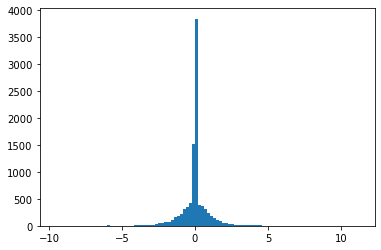

BCH-volume


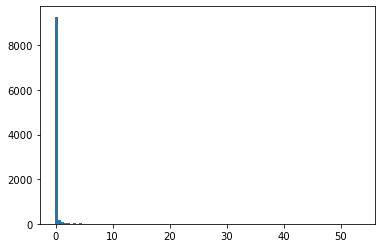

BTC-close


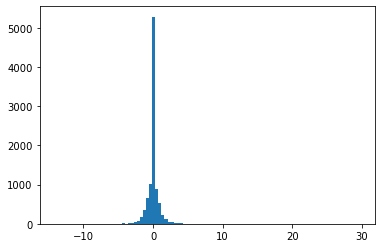

BTC-volume


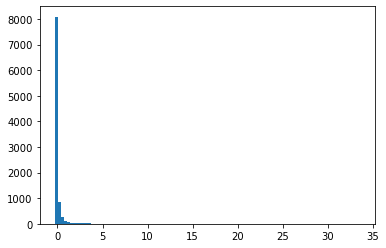

ETH-close


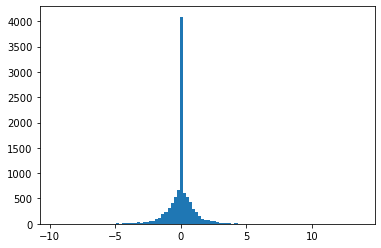

ETH-volume


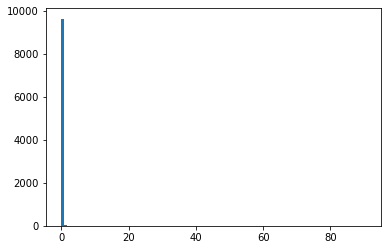

LTC-close


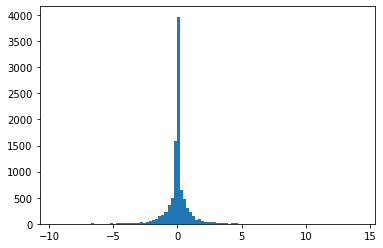

LTC-volume


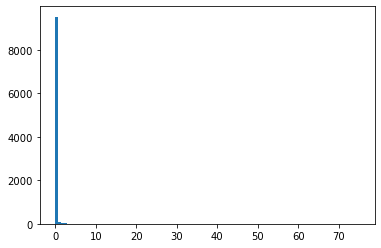

LTC-target


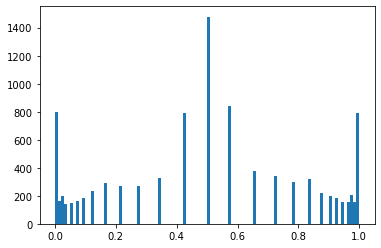

In [25]:
show(testdata)

In [26]:
typ = [0,1,2,2]
def pro2(df):
    seq_data = []
    prev_data = deque(maxlen = window)
    for i in df.values:
        prev_data.append([n for n in i[:-1]])
        if len(prev_data) == window:
            seq_data.append([np.array(prev_data), typ[int(i[-1]*3)]])
    random.shuffle(seq_data)
    return seq_data

In [27]:
TL = pro2(traindata)
testL = pro2(testdata)

In [28]:
def dim(M):
    print (str(type(M)))
    if str(type(M)) in ['int', 'float', "<class 'numpy.float64'>"]:
        return []
    return [len(M)]+dim(M[0])
dim(TL)

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


[75615, 2, 60, 8]

In [29]:
Data2 = pro2(df2)

In [30]:
dim(Data2)

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


[85300, 2, 60, 8]

## vid10

In [31]:
def unzip(A):
    X = np.array([i[0] for i in A])
    y = np.array([i[1] for i in A])
    return (X, y)

In [46]:
Xtl, Ytl = unzip(TL)
X_testl, Y_testl = unzip(testL)

In [33]:
X2, Y2 = unzip(Data2)

In [34]:
Counter(Y2)

Counter({2: 26914, 1: 30888, 0: 27498})

## vid11

In [35]:
#making the model
import time

epochs = 10
batchsize = 64
name = f'{ratio_to_predict}-{window}window-{future_to_predict}pred-{int(time.time())}'

In [49]:
model = Sequential()

model.add(LSTM(
    128, 
    input_shape = (Xtl.shape[1:]),
    return_sequences=True
    ))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(
    128, 
    input_shape = (Xtl.shape[1:]),
    return_sequences=True
    ))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(
    128, 
    input_shape = (Xtl.shape[1:]),
    #return_sequences=True
    ))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation = 'softmax'))

opt = tf.keras.optimizers.Adam(lr = 0.001, decay = 1e-6)

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

tensorboard = TensorBoard(log_dir = f'cryptologs\\{name}')

#Modelcheckpoint shit




In [50]:
model2 = tf.keras.models.clone_model(model)

In [51]:
model is model2

False

In [ ]:
history = model.fit(
    Xtl, Ytl,
    batch_size = batchsize,
    epochs = epochs, 
    validation_data = (X_testl, Y_testl),
    callbacks = [tensorboard]
)

Train on 75615 samples, validate on 9617 samples
Epoch 1/10
75615/75615 [==============================] - 293s 4ms/sample - loss: 1.1093 - accuracy: 0.3799 - val_loss: 1.0812 - val_accuracy: 0.4098
Epoch 2/10
75615/75615 [==============================] - 312s 4ms/sample - loss: 1.0648 - accuracy: 0.4255 - val_loss: 1.0520 - val_accuracy: 0.4456
Epoch 3/10
75615/75615 [==============================] - 312s 4ms/sample - loss: 1.0516 - accuracy: 0.4410 - val_loss: 1.1403 - val_accuracy: 0.3263
Epoch 4/10
75615/75615 [==============================] - 321s 4ms/sample - loss: 1.0449 - accuracy: 0.4501 - val_loss: 1.0545 - val_accuracy: 0.4431
Epoch 5/10
75615/75615 [==============================] - 317s 4ms/sample - loss: 1.0377 - accuracy: 0.4546 - val_loss: 1.0294 - val_accuracy: 0.4660
Epoch 6/10
75584/75615 [============================>.] - ETA: 0s - loss: 1.0352 - accuracy: 0.4589

In [ ]:
history2 = model2.fit(
    X2, Y2,
    batch_size = batchsize,
    epochs = epochs, 
    validation_split = 0.2,
    callbacks = [tensorboard]
)